In [327]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from trieste.observer import INEQUALITY_CONSTRAINT_PREFIX, OBJECTIVE

OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"

In [2]:
def process_ts_ackley_results(result_dir: str,
                           num_runs: int,
                           failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        assert (safe_obs_values.shape == failure_mask.shape)
        safe_obs_values[failure_mask] = failure_val
        safe_obs_values = safe_obs_values * 10.0
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### Ackley10

In [1]:
tr_res, tr_mean, tr_median, tr_std = process_ts_ackley_results("final_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
tr_matern_res, tr_matern_mean, tr_matern_median, tr_matern_std = process_ts_ackley_results("final_scbo_results/ackley_10/matern/data/", num_runs=30, failure_val=1.0)

NameError: name 'process_ts_ackley_results' is not defined

In [13]:
with open("final_scbo_results/ackley_10/trust_region/data/run_0_data.pkl", "rb") as fp:
    run0 = pickle.load(fp)

In [14]:
with open("final_scbo_results/ackley_10/trust_region/data/run_1_data.pkl", "rb") as fp:
    run1 = pickle.load(fp)

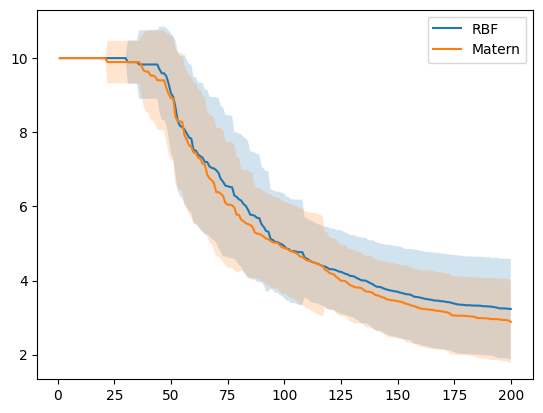

In [12]:
iters = [i for i in range(1, 201)]
plt.plot(iters, tr_mean, label="RBF")
plt.plot(iters, tr_matern_mean, label="Matern")
plt.fill_between(iters, tr_mean - tr_std, tr_mean + tr_std, alpha=0.2)
plt.fill_between(iters, tr_matern_mean - tr_matern_std, tr_matern_mean + tr_matern_std, alpha=0.2)
plt.legend()

In [10]:
iter = 200
print(f"RBF: 5%: {np.percentile(tr_res, 5, axis=0)[iter-1]}, Median: {np.percentile(tr_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(tr_res, 95, axis=0)[iter-1]}")
print(f"Matern: 5%: {np.percentile(tr_matern_res, 5, axis=0)[iter-1]}, Median: {np.percentile(tr_matern_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(tr_matern_res, 95, axis=0)[iter-1]}")

RBF: 5%: 0.7401723926126678, Median: 3.2908303516280544, 95%: 5.220323420786391
Matern: 5%: 1.1961636568236553, Median: 2.8014208950374435, 95%: 4.72222230633814


In [46]:
tr_res, tr_mean, tr_median, tr_std = process_ts_ackley_results("final_ts_al_results/ackley_10/trust_region/data/", num_runs=24, failure_val=1.0)
vanilla_res, vanilla_mean, vanilla_median, vanilla_std = process_ts_ackley_results("final_ts_al_results/ackley_10/vanilla/data/", num_runs=24, failure_val=1.0)
scbo_res, scbo_mean, scbo_median, scbo_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
scbo_vanilla_res, scbo_vanilla_mean, scbo_vanilla_median, scbo_vanilla_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/vanilla/data/", num_runs=30, failure_val=1.0)
scbo_vanilla_random_res, scbo_vanilla_random_mean, scbo_vanilla_random_median, scbo_vanilla_random_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/vanilla_random/data/", num_runs=10, failure_val=1.0)
bilog_res, bilog_mean, bilog_median, bilog_std = process_ts_ackley_results("experimental_scbo_results/ackley_10/trust_region_bilog/data/", num_runs=30, failure_val=1.0)

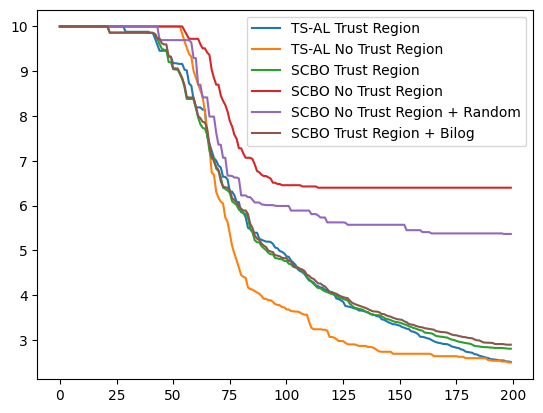

In [47]:
plt.plot(tr_mean, label="TS-AL Trust Region")
plt.plot(vanilla_mean, label="TS-AL No Trust Region")
plt.plot(scbo_mean, label="SCBO Trust Region")
plt.plot(scbo_vanilla_mean, label="SCBO No Trust Region")
plt.plot(scbo_vanilla_random_mean, label="SCBO No Trust Region + Random")
plt.plot(bilog_mean, label="SCBO Trust Region + Bilog")
plt.legend()

In [52]:
def process_lockwood_results(result_dir: str,
                       num_runs: int,
                       failure_val: float):
    all_results = []
    for run in range(10, 10 + num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        objective_vals = objective_vals * 10000
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [41]:
lockwood_tr_res, lockwood_tr_mean, lockwood_tr_median, lockwood_tr_std = process_lockwood_results("final_ts_al_results/lockwood/trust_region/data/", num_runs=11, failure_val=60000.0)
lockwood_vanilla_res, lockwood_vanilla_mean, lockwood_vanilla_median, lockwood_vanilla_std = process_lockwood_results("final_ts_al_results/lockwood/vanilla_adam/data/", num_runs=22, failure_val=60000.0)

In [11]:
bfgs_res, bfgs_mean, bfgs_median, bfgs_std = process_lockwood_results("final_ts_al_results/lockwood/l-bfgs-b/data/", num_runs=21, failure_val=60000.0)

In [53]:
scbo_res, scbo_mean, scbo_median, scbo_std = process_lockwood_results("experimental_scbo_results/lockwood/trust_region/data/", num_runs=15, failure_val=60000.0)

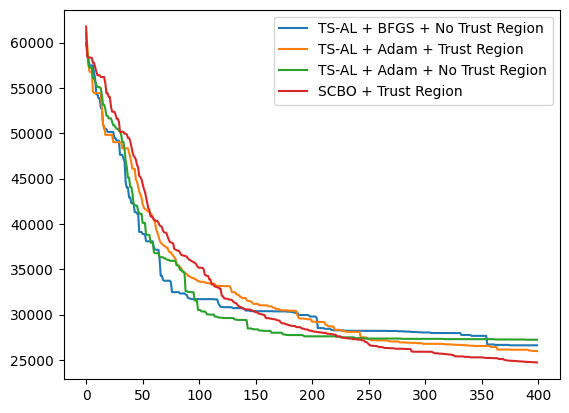

In [54]:
plt.plot(bfgs_mean, label="TS-AL + BFGS + No Trust Region")
plt.plot(lockwood_tr_mean, label="TS-AL + Adam + Trust Region")
plt.plot(lockwood_vanilla_mean, label="TS-AL + Adam + No Trust Region")
plt.plot(scbo_mean, label="SCBO + Trust Region")
plt.legend()
plt.show()

In [25]:
key_iterations = [100, 250, 400]

In [43]:
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(bfgs_res, 5, axis=0)[iter-1]}, Median: {np.percentile(bfgs_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(bfgs_res, 95, axis=0)[iter-1]}")

Iter: 100
5%: 25922.19, Median: 30074.24, 95%: 47265.62
Iter: 250
5%: 25166.2, Median: 27672.57, 95%: 30014.26
Iter: 400
5%: 24497.18, Median: 26882.16, 95%: 28519.0


In [55]:
print("SCBO + Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_res, 95, axis=0)[iter-1]}")

SCBO + Trust Region
Iter: 100
5%: 27243.987, Median: 33615.45, 95%: 46825.34299999999
Iter: 250
5%: 24051.797000000002, Median: 26131.000000000004, 95%: 31004.293
Iter: 400
5%: 23252.013000000003, Median: 24411.81, 95%: 26922.423


In [44]:
print(f"TS-AL + Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(lockwood_tr_res, 5, axis=0)[iter-1]}, Median: {np.percentile(lockwood_tr_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(lockwood_tr_res, 95, axis=0)[iter-1]}")

TS-AL + Trust Region
Iter: 100
5%: 25607.575, Median: 32526.929999999997, 95%: 44303.475
Iter: 250
5%: 24155.115, Median: 27129.31, 95%: 30915.21
Iter: 400
5%: 23533.309999999998, Median: 25657.54, 95%: 30190.57


In [45]:
print("TS-AL + No Trust Region")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(lockwood_vanilla_res, 5, axis=0)[iter-1]}, Median: {np.percentile(lockwood_vanilla_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(lockwood_vanilla_res, 95, axis=0)[iter-1]}")

TS-AL + No Trust Region
Iter: 100
5%: 26518.120499999997, Median: 29537.3, 95%: 34296.768
Iter: 250
5%: 25844.023999999998, Median: 27452.190000000002, 95%: 28570.438
Iter: 400
5%: 25844.023999999998, Median: 27376.0, 95%: 28557.32


In [328]:
def process_results(result_dir: str,
                    num_runs: int,
                    failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        satisfied_mask = np.full(shape=run_data[OBJECTIVE].observations.shape[0], fill_value=True)
        for key in run_data.keys():
            if key.startswith(INEQUALITY_CONSTRAINT_PREFIX):
                inequality_constraint_satisfied = run_data[key].observations.numpy().squeeze() <= 0
                satisfied_mask = np.logical_and(satisfied_mask, inequality_constraint_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        objective_vals = objective_vals
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### Lunar Lander

In [312]:
with open("final_ts_al_results/corrected_lunar_10/data/run_1_data.pkl", "rb") as fp:
    corrected_ll_run_one = pickle.load(fp)

In [313]:
env_name = "LunarLander-v2"
env = gym.make(env_name)
data = lunar_lander.lunar_lander_observer(10, env, corrected_ll_run_one[OBJECTIVE].query_points)

In [315]:
corrected_ll_run_one[OBJECTIVE].observations.numpy().squeeze() - data[OBJECTIVE].observations.numpy().squeeze()

array([ 0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00, -4.1350108934135044e-08,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        1.0000000000000009e-02,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
       -5.9643844974033300e-08,

In [319]:
tr_l10_res, tr_l10_mean, tr_l10_median, tr_l10_std = process_results("final_scbo_results/lunar_10/trust_region_default_noise/data/", num_runs=30, failure_val=1.0)
corrected_tr_l10_res, corrected_tr_l10_mean, corrected_tr_l10_median, corrected_tr_l10_std = process_results("final_scbo_results/corrected_lunar_10/data/", num_runs=30, failure_val=1.0)
tr_l50_res, tr_l50_mean, tr_l50_median, tr_l50_std = process_results("final_scbo_results/lunar_50/trust_region/data/", num_runs=30, failure_val=1.0)

In [309]:
ts_al_l10_res, ts_al_l10_mean, ts_al_l10_median, ts_al_l10_std = process_results("final_ts_al_results/lunar_10/data/", num_runs=30, failure_val=1.0)
corrected_ts_al_l10_res, corrected_ts_al_l10_mean, corrected_ts_al_l10_median, corrected_ts_al_l10_std = process_results("final_ts_al_results/corrected_lunar_10/data/", num_runs=30, failure_val=1.0)

In [326]:
print(f"SCBO Failures (Updated LL): {np.sum(corrected_tr_l10_res[:, -1] == 1)}/30")
print(f"SCBO Failures (Original LL): {np.sum(tr_l10_res[:, -1] == 1)}/30")
print(f"TS-AL Failures (Updated LL): {np.sum(corrected_ts_al_l10_res[:, -1] == 1)}/30")
print(f"TS-AL Failures (Original LL): {np.sum(ts_al_l10_res[:, -1] == 1)}/30")

SCBO Failures (Updated LL): 9/30
SCBO Failures (Original LL): 8/30
TS-AL Failures (Updated LL): 15/30
TS-AL Failures (Original LL): 11/30


In [99]:
tr_l50_res[:, -1]

array([-2.81185663, -2.80471854, -2.87766536,  1.        ,  1.        ,
       -2.81092088, -2.83971695, -2.85892867, -2.76801377, -2.7617926 ,
       -2.80376357, -2.79476651, -2.79032866,  1.        , -2.73239897,
       -2.88729471,  1.        , -2.79298944, -2.83648133,  1.        ,
       -2.89519129,  1.        ,  1.        , -2.67495232, -2.7525635 ,
       -2.7034212 , -2.82764463, -2.80380542,  1.        , -2.71276955])

In [93]:
ts_al_l10_res[:, -1]

array([-2.81319234, -2.83690769, -2.81346446, -2.75595386, -2.78219124,
       -2.80878284, -2.80806546,  1.        ,  1.        , -2.81862047,
       -2.75680733,  1.        , -2.76825318, -2.72176061, -2.78035913,
       -2.76654857,  1.        , -2.81705968, -2.82284696,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -2.79950796,  1.        , -2.81957508, -2.74664345, -2.81502852])

In [310]:
corrected_ts_al_l10_res[:, -1]

array([ 1.                ,  1.                ,  1.                ,
       -2.81398407142476  , -2.7346421839362525, -2.8366281017686052,
        1.                ,  1.                ,  1.                ,
       -2.7751611324857826, -2.7169845577313154,  1.                ,
       -2.8290941419765807,  1.                , -2.740611757193453 ,
        1.                ,  1.                , -2.8300455772687276,
       -2.814334492686693 , -2.804601332172852 ,  1.                ,
        1.                , -2.791426366013808 ,  1.                ,
        1.                , -2.804793915235983 ,  1.                ,
       -2.8298826977638845, -2.7372877802112825, -2.791500539959554 ])

In [94]:
tr_l10_res[:, -1]

array([ 1.        , -2.75562946, -2.53792587, -2.80863223, -2.81424998,
       -2.79501671, -2.79725671, -2.76848057,  1.        , -2.81682331,
       -2.74562076, -2.76401306, -2.80311993, -2.75303816, -2.81382373,
       -2.80535838,  1.        , -2.80842203, -2.83238254, -2.78780277,
        1.        , -2.80906356,  1.        , -2.79765395,  1.        ,
       -2.83930875,  1.        , -2.75882222, -2.79700395,  1.        ])

### Final Lockwood

In [150]:
ts_al_lockwood_res, ts_al_lockwood_mean, ts_al_lockwood_median, ts_al_lockwood_std = process_results("final_ts_al_results/lockwood/trust_region/data/", num_runs=30, failure_val=6.0)
scbo_lockwood_res, scbo_lockwood_mean, scbo_lockwood_median, sbco_lockwood_std = process_results("final_scbo_results/lockwood/trust_region/data/", num_runs=30, failure_val=6.0)

In [151]:
key_iterations = [100, 250, 400]
print("SCBO")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(scbo_lockwood_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_lockwood_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_lockwood_res, 95, axis=0)[iter-1]}")
print()
print("TS-AL")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(ts_al_lockwood_res, 5, axis=0)[iter-1]}, Median: {np.percentile(ts_al_lockwood_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(ts_al_lockwood_res, 95, axis=0)[iter-1]}")

SCBO
Iter: 100
5%: 2.6293002, Median: 3.0995745, 95%: 4.166242049999999
Iter: 250
5%: 2.4111292, Median: 2.5181735, 95%: 2.93391
Iter: 400
5%: 2.31646235, Median: 2.3770985, 95%: 2.5989881999999995

TS-AL
Iter: 100
5%: 2.7716088, Median: 3.4689605, 95%: 4.5961244500000005
Iter: 250
5%: 2.4039013, Median: 2.854221, 95%: 3.62584295
Iter: 400
5%: 2.3540516, Median: 2.566929, 95%: 2.9855678


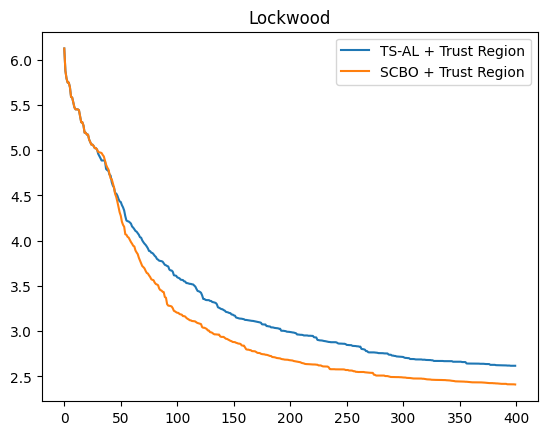

In [149]:
plt.plot(ts_al_lockwood_mean, label="TS-AL + Trust Region")
plt.plot(scbo_lockwood_mean, label="SCBO + Trust Region")
plt.title("Lockwood")
plt.legend()

In [69]:
hv_lockwood_res, hv_lockwood_mean, hv_lockwood_median, hv_lockwood_std = process_results("final_ts_al_results/lockwood/squared_exponential_heavy_optimise/data/", num_runs=2, failure_val=6.0)
exp_lockwood_res, exp_lockwood_mean, exp_lockwood_median, exp_lockwood_std = process_results("experimental_ts_al_results/lockwood/trust_region/data/", num_runs=2, failure_val=6.0)

In [71]:
exp_lockwood_res[0, -1]

2.603167

In [72]:
hv_lockwood_res[0, -1]

2.525586

In [68]:
se_ts_al_lockwood_res[1, -1]

2.414095

In [58]:
with open("final_ts_al_results/lockwood/squared_exponential_heavy_optimise/data/run_0_data.pkl", "rb") as fp:
    run0 = pickle.load(fp)

In [60]:
with open("experimental_ts_al_results/lockwood/trust_region/data/run_0_data.pkl", "rb") as fp:
    originalrun1 = pickle.load(fp)

### Keane30

In [330]:
scbo_keane_30_res, scbo_keane_30_mean, scbo_keane_30_median, scbo_keane_30_std = process_results("final_scbo_results/keane_30/data/", num_runs=30, failure_val=-0.1)
ts_al_keane_30_res, ts_al_keane_30_mean, ts_al_keane_30_median, ts_al_keane_30_std = process_results("final_ts_al_results/keane_30/data/", num_runs=30, failure_val=-0.1)

In [334]:
key_iterations = [500, 1000, 1500]
print("TS-AL")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(ts_al_keane_30_res, 5, axis=0)[iter-1]}, Median: {np.percentile(ts_al_keane_30_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(ts_al_keane_30_res, 95, axis=0)[iter-1]}")
print()
print("SCBO")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(scbo_keane_30_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_keane_30_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_keane_30_res, 95, axis=0)[iter-1]}")

TS-AL
Iter: 500
5%: -3.181141359669914, Median: -2.3236231702814405, 95%: -1.8321003240027502
Iter: 1000
5%: -4.591253412459057, Median: -3.187659109205077, 95%: -2.344173454226788
Iter: 1500
5%: -5.053842850837352, Median: -3.4121889812016577, 95%: -2.50523001728698

SCBO
Iter: 500
5%: -2.6322306224029557, Median: -2.085462960365083, 95%: -1.7823333531068042
Iter: 1000
5%: -3.6538780777281348, Median: -2.741978340186388, 95%: -2.279680275359711
Iter: 1500
5%: -4.428134874392738, Median: -2.9503694293753124, 95%: -2.4134054440411528


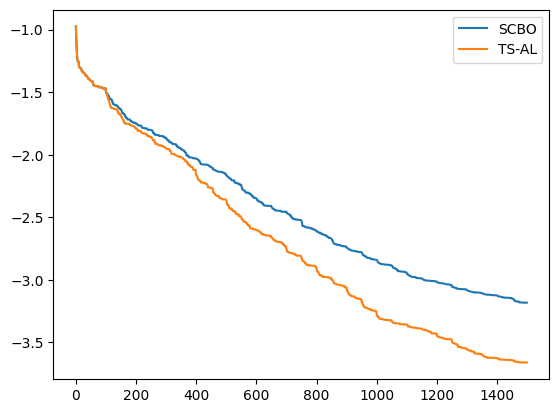

In [332]:
plt.plot(scbo_keane_30_mean, label="SCBO")
plt.plot(ts_al_keane_30_mean, label="TS-AL")
plt.legend()
plt.show()

### Final Ackley10

In [316]:
scbo_res, scbo_mean, scbo_median, scbo_std = process_results("final_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
ts_al_res, ts_al_mean, ts_al_median, ts_al_std = process_results("final_ts_al_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
updated_scbo_res, updated_scbo_mean, updated_scbo_median, updated_scbo_std = process_results("final_scbo_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
updated_ts_al_res, updated_ts_al_mean, updated_ts_al_median, updated_ts_al_std = process_results("final_ts_al_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)

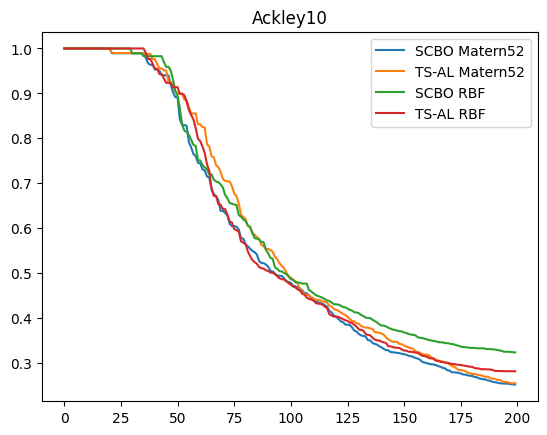

In [318]:
plt.plot(updated_scbo_mean, label="SCBO Matern52")
plt.plot(updated_ts_al_mean, label="TS-AL Matern52")
plt.plot(scbo_mean, label="SCBO RBF")
plt.plot(ts_al_mean, label="TS-AL RBF")
plt.title("Ackley10")
plt.legend()

In [155]:
from functions import objectives

In [248]:
with open("experimental_scbo_results/ackley_10/vanilla_random/data/run_1_data.pkl", "rb") as fp:
    scbo_vanilla_run1 = pickle.load(fp)

In [249]:
scbo_vanilla_res = objectives.ackley_10(scbo_vanilla_run1[OBJECTIVE].query_points)

In [250]:
scbo_vanilla_res.numpy().squeeze() - scbo_vanilla_run1[OBJECTIVE].observations.numpy().squeeze()

array([ 0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00, -2.2204460492503131e-16,
        2.2204460492503131e-16,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
       -2.2204460492503131e-16,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
       -2.2204460492503131e-16,  0.0000000000000000e+00,
        2.2204460492503131e-16,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,  0.0000000000000000e+00,
        0.0000000000000000e+00,

In [247]:
 1.0 + max(tf.abs(scbo_vanilla_res.numpy().squeeze() - scbo_vanilla_run1[OBJECTIVE].observations.numpy().squeeze()))/4.0

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [214]:
with open("experimental_ts_al_results/ackley_10/vanilla/data/run_1_data.pkl", "rb") as fp:
    ts_al_vanilla_run1 = pickle.load(fp)

In [212]:
ts_al_vanilla_res = objectives.ackley_10(ts_al_vanilla_run1[OBJECTIVE].query_points)

In [213]:
ts_al_vanilla_res.numpy().squeeze() == ts_al_vanilla_run1[OBJECTIVE].observations.numpy().squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [289]:
with open("final_ts_al_results/ackley_10/trust_region/data/run_23_data.pkl", "rb") as fp:
    run1 = pickle.load(fp)
res = objectives.ackley_10(run1[OBJECTIVE].query_points)
max(np.abs(run1[OBJECTIVE].observations.numpy().squeeze() - res.numpy().squeeze()))

4.440892098500626e-16

In [164]:
res[9].numpy() == run1[OBJECTIVE].observations[9].numpy()

array([False])

In [175]:
np.set_printoptions(precision=20)

In [186]:
run1[OBJECTIVE].observations.numpy().squeeze()[9]

1.5314805165496646

In [187]:
res[9].numpy()

array([1.5314805165496643])

In [157]:
res

<tf.Tensor: shape=(200, 1), dtype=float64, numpy=
array([[1.44284642],
       [1.5780773 ],
       [1.3560891 ],
       [1.43763695],
       [1.28305501],
       [1.5002238 ],
       [1.35665167],
       [1.32886221],
       [1.29247811],
       [1.53148052],
       [1.36436188],
       [1.16661296],
       [1.31586647],
       [1.02685666],
       [1.29415858],
       [1.25777958],
       [1.48443438],
       [1.4177259 ],
       [1.33961165],
       [1.30475722],
       [1.37789608],
       [1.248919  ],
       [1.41916296],
       [1.4210462 ],
       [1.24014911],
       [1.36066443],
       [1.49111566],
       [1.06136579],
       [1.28625214],
       [1.32118754],
       [1.09059663],
       [1.36479409],
       [1.28143673],
       [1.19825748],
       [1.20935106],
       [1.25068416],
       [1.40495873],
       [1.14936923],
       [1.49085841],
       [1.15989846],
       [1.15955234],
       [1.06777742],
       [1.01305795],
       [1.19667386],
       [0.93198626],
     

In [152]:
scbo_res, scbo_mean, scbo_median, scbo_std = process_results("final_scbo_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
ts_al_res, ts_al_mean, ts_al_median, ts_al_std = process_results("final_ts_al_results/ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)

In [74]:
updated_scbo_res, updated_scbo_mean, updated_scbo_median, updated_scbo_std = process_results("final_scbo_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)
updated_ts_al_res, updated_ts_al_mean, updated_ts_al_median, updated_ts_al_std = process_results("final_ts_al_results/updated_ackley_10/trust_region/data/", num_runs=30, failure_val=1.0)

In [ ]:
key_iterations = [100, 250, 400]
print("TS-AL")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"5%: {np.percentile(ts_al_lockwood_res, 5, axis=0)[iter-1]}, Median: {np.percentile(ts_al_lockwood_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(ts_al_lockwood_res, 95, axis=0)[iter-1]}")

In [195]:
with open('final_scbo_results/lunar_10/trust_region_default_noise/data/run_1_data.pkl', 'rb') as fp:
    ll_run1 = pickle.load(fp)

In [196]:
env_name = "LunarLander-v2"
env = gym.make(env_name)
data = lunar_lander.lunar_lander_observer(10, env, ll_run1[OBJECTIVE].query_points)

In [307]:
ll_run1[OBJECTIVE].query_points[380]

<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([0.23369889038420863 , 0.26774014620508657 , 0.2735376051121257  ,
       0.2997768858021939  , 0.6177483298073877  , 0.7301028167611718  ,
       0.5806673609739257  , 0.9615451067519928  , 0.07313039905288293 ,
       0.3626741110509404  , 0.07945107270237381 , 0.009656828642440243])>

In [304]:
for i in range(10):
    print(f"i={i} Saved: {ll_run1[f'INEQUALITY_CONSTRAINT_{i}'].observations[34]}")

i=0 Saved: [1.7863914866398642]
i=1 Saved: [2.257268878717671]
i=2 Saved: [4.3194804822936455]
i=3 Saved: [2.5164973346730677]
i=4 Saved: [2.5937759757309884]
i=5 Saved: [1.782927072645674]
i=6 Saved: [1.8965010621701714]
i=7 Saved: [1.8033586932839933]
i=8 Saved: [1.5097745650527616]
i=9 Saved: [3.5943377693438707]


In [298]:
print(f"Saved:       {ll_run1[OBJECTIVE].observations.numpy().squeeze()[34]}")
print(f"Freshly Run: {data[OBJECTIVE].observations.numpy().squeeze()[34]}")

Saved:       0.4060313320551708
Freshly Run: 0.406031364411133


In [294]:
np.abs(ll_run1["OBJECTIVE"].observations.numpy().squeeze() - data["OBJECTIVE"].observations.numpy().squeeze())[34]

3.235596224282489e-08

In [305]:
np.argmax(np.abs(ll_run1[OBJECTIVE].observations.numpy().squeeze() - data[OBJECTIVE].observations.numpy().squeeze()))

380

In [366]:
env_name = "LunarLander-v2"
env = gym.make(env_name)
data2 = lunar_lander.lunar_lander_observer(10, env, run1[OBJECTIVE].query_points)

Mean Rewards: [[ 1.1694894325365268e+00]
 [ 6.9703164473660040e-01]
 [ 1.1184257284746679e+00]
 [-2.6803635512903996e-02]
 [ 9.6623473745294530e-01]
 [ 1.0851131018673552e+00]
 [ 1.4840085358772517e+00]
 [ 1.1545726205775191e+00]
 [ 1.2516791327206105e+00]
 [ 1.5707310500081733e+00]
 [ 1.4740260976746054e+00]
 [ 1.7480032214978589e+00]
 [ 1.2679711621607437e+00]
 [ 1.9604464245658010e-02]
 [ 6.2444478514640389e-01]
 [ 8.8390632644745426e-01]
 [ 1.5253650534646042e+00]
 [ 2.1547418179612414e+00]
 [ 2.6182939352912564e+00]
 [ 1.1287605576288380e+00]
 [ 6.5474368360364710e-01]
 [ 6.6282608104277108e-01]
 [ 1.9282470238849073e-01]
 [ 1.2234195535258334e+00]
 [ 1.0209325284163178e+00]
 [ 1.2857389370358585e+00]
 [ 7.0719088721278944e-01]
 [ 8.6338180473667381e-01]
 [ 1.4913262508215190e+00]
 [ 1.2715177089624334e+00]
 [ 6.5105227278313627e-01]
 [ 1.4876947380713017e+00]
 [ 9.9837911067228335e-01]
 [ 9.7834160878442611e-01]
 [ 4.0603136441113302e-01]
 [ 1.1390687819659846e+00]
 [ 6.418417328

In [367]:
for key in data2.keys():
    print(f"Key {key} Equal: {np.where(np.equal(data2[key].observations.numpy(), run1[key].observations.numpy()) == False)}")

Key INEQUALITY_CONSTRAINT_0 Equal: (array([162, 764, 794, 795, 895, 954, 965, 985, 991, 995]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_1 Equal: (array([ 34, 105, 115, 134, 135, 204, 300, 444, 911, 941]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_2 Equal: (array([ 56, 179, 285, 389, 394, 398, 451, 454, 464, 581, 958, 991]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_3 Equal: (array([100, 214, 319, 320, 344, 525, 541, 925, 934]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_4 Equal: (array([ 80, 350, 365, 378, 380, 391, 460, 475, 484, 555, 571, 580, 584,
       590, 595, 651, 654, 664, 665, 670, 684, 755, 761, 765, 781, 785,
       794, 799, 850, 851, 854, 855, 858, 860, 861, 864, 870, 874, 875,
       884, 954]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_5 Equal: (array([231

In [389]:
data["OBJECTIVE"].observations[0][0]

<tf.Tensor: shape=(), dtype=float64, numpy=1.1694894325365268>

In [374]:
len(np.where(np.equal(data["OBJECTIVE"].observations.numpy(), run1["OBJECTIVE"].observations.numpy()) == False)[0])

134

In [392]:
(run1["OBJECTIVE"].query_points == data["OBJECTIVE"].query_points).numpy().all()

True

In [395]:
(run1["OBJECTIVE"].observations.numpy().squeeze() == data["OBJECTIVE"].observations.numpy().squeeze()).sum()

866

In [358]:
for key in data.keys():
    print(f"Key {key} Equal: {np.where(np.equal(data[key].observations.numpy(), run1[key].observations.numpy()) == False)}")

Key INEQUALITY_CONSTRAINT_0 Equal: (array([162, 764, 794, 795, 895, 954, 965, 985, 991, 995]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_1 Equal: (array([ 34, 105, 115, 134, 135, 204, 300, 444, 911, 941]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_2 Equal: (array([ 56, 179, 285, 389, 394, 398, 451, 454, 464, 581, 958, 991]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_3 Equal: (array([100, 214, 319, 320, 344, 525, 541, 925, 934]), array([0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_4 Equal: (array([ 80, 350, 365, 378, 380, 391, 460, 475, 484, 555, 571, 580, 584,
       590, 595, 651, 654, 664, 665, 670, 684, 755, 761, 765, 781, 785,
       794, 799, 850, 851, 854, 855, 858, 860, 861, 864, 870, 874, 875,
       884, 954]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
Key INEQUALITY_CONSTRAINT_5 Equal: (array([231

In [385]:
sum = 0.0
for i in range(10):
    sum += tf.nn.relu(data[f'INEQUALITY_CONSTRAINT_{i}'].observations[34])
print(sum)

tf.Tensor([24.06031364411133], shape=(1,), dtype=float64)


In [390]:
run1[f'INEQUALITY_CONSTRAINT_1'].observations[34]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.257268878717671])>

In [362]:
data[f'INEQUALITY_CONSTRAINT_1'].observations[34]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.257269202277294])>

In [361]:
run1[f'INEQUALITY_CONSTRAINT_1'].observations[34]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.257268878717671])>

In [359]:
run1[OBJECTIVE].query_points[34]

<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([0.417509849022173  , 0.8151445852240101 , 0.5542238672033017 ,
       0.02824296592134945, 0.6887390072109282 , 0.48174070023392157,
       0.29544770952650284, 0.4353022417483064 , 0.14989989084384164,
       0.37192989382743114, 0.1432089953810865 , 0.271542013550477  ])>

In [318]:
run1[OBJECTIVE].query_points[547]

<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([0.5626366413004251  , 0.3943582184735236  , 0.5683174876804802  ,
       0.2641134893123961  , 0.5673570338965708  , 0.31857176674978793 ,
       0.3645675089201845  , 0.868453390008974   , 0.6738793434952213  ,
       0.011002966872931138, 0.13049755002366736 , 0.11838287152454276 ])>

In [280]:
i = 0
for qp in run1[OBJECTIVE].query_points:
    print(f"qp{i}: {qp[0]}")
    i += 1

qp0: 0.183134849022173
qp1: 0.933134849022173
qp2: 0.433134849022173
qp3: 0.558134849022173
qp4: 0.058134849022173
qp5: 0.808134849022173
qp6: 0.308134849022173
qp7: 0.745634849022173
qp8: 0.245634849022173
qp9: 0.995634849022173
qp10: 0.495634849022173
qp11: 0.620634849022173
qp12: 0.120634849022173
qp13: 0.870634849022173
qp14: 0.370634849022173
qp15: 0.651884849022173
qp16: 0.151884849022173
qp17: 0.901884849022173
qp18: 0.401884849022173
qp19: 0.526884849022173
qp20: 0.026884849022173
qp21: 0.776884849022173
qp22: 0.276884849022173
qp23: 0.714384849022173
qp24: 0.214384849022173
qp25: 0.964384849022173
qp26: 0.464384849022173
qp27: 0.589384849022173
qp28: 0.089384849022173
qp29: 0.839384849022173
qp30: 0.339384849022173
qp31: 0.667509849022173
qp32: 0.167509849022173
qp33: 0.917509849022173
qp34: 0.417509849022173
qp35: 0.542509849022173
qp36: 0.042509849022173
qp37: 0.792509849022173
qp38: 0.292509849022173
qp39: 0.730009849022173
qp40: 0.230009849022173
qp41: 0.980009849022173
qp

qp181: 0.9525384142873667
qp182: 0.7022807128201717
qp183: 0.7712099640286968
qp184: 0.8878014070393102
qp185: 0.7829356888932847
qp186: 0.7529634276433534
qp187: 0.9833353227335099
qp188: 0.9917101824003098
qp189: 0.9157945212112563
qp190: 0.8146819088991955
qp191: 0.8275145305145846
qp192: 0.7660256524233444
qp193: 0.8698340573976854
qp194: 0.9035412066881638
qp195: 0.8772917688038075
qp196: 0.756976990537535
qp197: 0.8855035220246972
qp198: 0.700588329303068
qp199: 0.9386123336372216
qp200: 0.8084806363623369
qp201: 0.9617587874793636
qp202: 0.9544031354261162
qp203: 0.9867986654294719
qp204: 0.8224807929200337
qp205: 0.8811882505733719
qp206: 0.779356388751502
qp207: 0.6491829032905211
qp208: 0.9499107533966016
qp209: 0.6179676992196464
qp210: 0.927354109046858
qp211: 0.9578720656396555
qp212: 0.6138536003784859
qp213: 0.6439136648519524
qp214: 0.7282990477275207
qp215: 0.8976862451145327
qp216: 0.6483524023110988
qp217: 0.9848320730951219
qp218: 0.9544031354261162
qp219: 0.7046596

In [271]:
updated_ts_al_res[:,-1]

array([0.1638166420516221 , 0.4884955725902195 , 0.17786846384220958,
       0.07185931296108591, 0.316494360294854  , 0.23876830585184655,
       0.46553688827969675, 0.4863143357735041 , 0.17496990200667675,
       0.2083210350765178 , 0.06591591686988992, 0.13967806206764308,
       0.32669877126815694, 0.305439474699325  , 0.2535174502213827 ,
       0.12812562290736196, 0.05336155500990145, 0.3043688195517486 ,
       0.4373580237543063 , 0.2561291629017369 , 0.3790132361830807 ,
       0.4698724907250892 , 0.16011644609693398, 0.27239758097647987,
       0.1830001308641293 , 0.26856480584062437, 0.24436046921644347,
       0.25085167526936447, 0.18256090906168296, 0.16692546078500498])

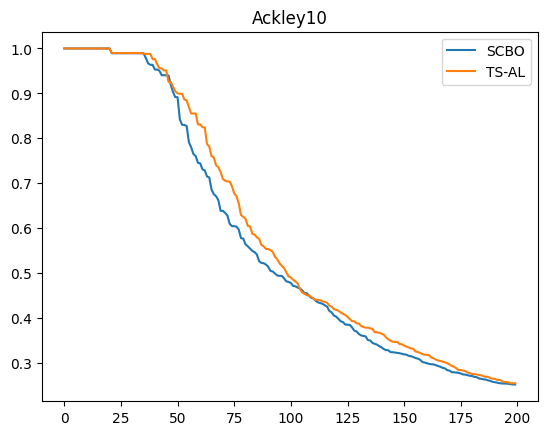

In [171]:
exp_ts_al_res, exp_ts_al_mean, exp_ts_al_median, exp_ts_al_std = process_results("experimental_ts_al_results/ackley_10/trust_region/data/", num_runs=24, failure_val=1.0)

In [176]:
exp_ts_al_res[0][82]

0.608565948554908

In [114]:
np.mean(scbo_res[:, -1])

0.32329865134820973

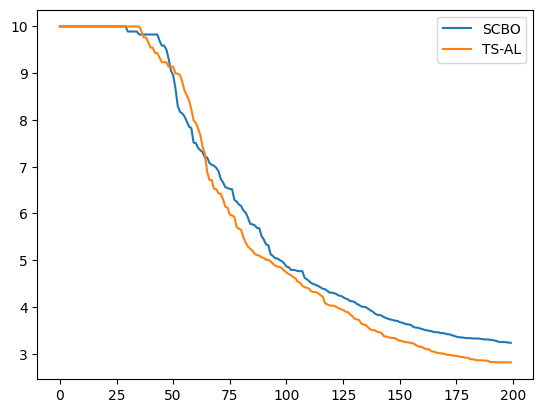

In [215]:
plt.plot(scbo_mean*10, label="SCBO")
plt.plot(ts_al_mean*10, label="TS-AL")
plt.legend()

In [76]:
key_iterations = [50, 150, 200]

In [77]:
print("SCBO")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"Original - 5%: {np.percentile(scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(scbo_res, 95, axis=0)[iter-1]}")
    print(f"Updated - 5%: {np.percentile(updated_scbo_res, 5, axis=0)[iter-1]}, Median: {np.percentile(updated_scbo_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(updated_scbo_res, 95, axis=0)[iter-1]}")

SCBO
Iter: 50
Original - 5%: 0.6072741210409403, Median: 1.0, 95%: 1.0
Updated - 5%: 0.5842433329213552, Median: 1.0, 95%: 1.0
Iter: 150
Original - 5%: 0.1827046813602281, Median: 0.37417481539496633, 95%: 0.5638900921647412
Updated - 5%: 0.18735667703010045, Median: 0.29751107718223757, 95%: 0.5206060031660483
Iter: 200
Original - 5%: 0.07401723926126678, Median: 0.32908303516280546, 95%: 0.5220323420786391
Updated - 5%: 0.10624174678224717, Median: 0.2215358109406214, 95%: 0.4843613128835706


In [78]:
print("TS-AL")
for iter in key_iterations:
    print(f"Iter: {iter}")
    print(f"Original - 5%: {np.percentile(ts_al_res, 5, axis=0)[iter-1]}, Median: {np.percentile(ts_al_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(ts_al_res, 95, axis=0)[iter-1]}")
    print(f"Updated - 5%: {np.percentile(updated_ts_al_res, 5, axis=0)[iter-1]}, Median: {np.percentile(updated_ts_al_res, 50, axis=0)[iter-1]}, 95%: {np.percentile(updated_ts_al_res, 95, axis=0)[iter-1]}")

TS-AL
Iter: 50
Original - 5%: 0.5818156608190933, Median: 1.0, 95%: 1.0
Updated - 5%: 0.5939653485230698, Median: 1.0, 95%: 1.0
Iter: 150
Original - 5%: 0.14659729580097816, Median: 0.34277981673342617, 95%: 0.4668550072458511
Updated - 5%: 0.12945874840706106, Median: 0.3438655849710347, 95%: 0.5137666029602157
Iter: 200
Original - 5%: 0.13161307318281665, Median: 0.27978475641367667, 95%: 0.4354929255236629
Updated - 5%: 0.06859044511092811, Median: 0.24760607224290399, 95%: 0.47891550550171735


In [108]:
ts_al_median[-1]

0.27978475641367667

In [109]:
scbo_median[-1]

0.32908303516280546

In [76]:
tr_res, tr_mean, tr_median, tr_std = process_results("final_scbo_results/lunar_10/trust_region/data/", num_runs=30, failure_val=-2.0)

In [46]:
updated_tr_res, updated_tr_mean, updated_tr_median, updated_tr_std = process_results("final_scbo_results/lunar_10/trust_region_default_noise/data/", num_runs=30, failure_val=-2.0)

In [44]:
ts_al_lunar10_res, ts_al_lunar10_mean, ts_al_lunar10_median, ts_al_lunar10_std = process_results("final_ts_al_results/lunar_10/data/", num_runs=30, failure_val=-2.0)

In [332]:
ft, _, _, _ = process_results("final_scbo_results/lunar_10/trust_region_500_rff/data/", num_runs=4, failure_val=-2.0)

In [333]:
ft[:, -1]

array([-2.                , -2.7556294593741244, -2.5379258664844846,
       -2.808632225680495 ])

In [240]:
np.argmin(tr_res[0])

652

In [95]:
updated_tr_res[:, -1]

array([-2.        , -2.75562946, -2.53792587, -2.80863223, -2.81424998,
       -2.79501671, -2.79725671, -2.76848057, -2.        , -2.81682331,
       -2.74562076, -2.76401306, -2.80311993, -2.75303816, -2.81382373,
       -2.80535838, -2.        , -2.80842203, -2.83238254, -2.78780277,
       -2.        , -2.80906356, -2.        , -2.79765395, -2.        ,
       -2.83930875, -2.        , -2.75882222, -2.79700395, -2.        ])

In [96]:
ts_al_lunar10_res[:, -1]

array([-2.81319234, -2.83690769, -2.81346446, -2.75595386, -2.78219124,
       -2.80878284, -2.80806546, -2.        , -2.        , -2.81862047,
       -2.75680733, -2.        , -2.76825318, -2.72176061, -2.78035913,
       -2.76654857, -2.        , -2.81705968, -2.82284696, -2.        ,
       -2.        , -2.        , -2.        , -2.        , -2.        ,
       -2.79950796, -2.        , -2.81957508, -2.74664345, -2.81502852])

In [95]:
tr_res[:, -1]

array([-2.816238927743087 , -2.                , -2.                ,
       -2.8102084298169276, -2.                , -2.8003130041237183,
       -2.                , -2.                , -2.                ,
       -2.7977907070528865, -2.7826497310079987, -2.848070482807988 ,
       -2.                , -2.                , -2.797306928234579 ,
       -2.                , -2.                , -2.827941513122439 ,
       -2.808764112464606 , -2.734327041468467 , -2.                ,
       -2.                , -2.756520258299985 , -2.818340970908141 ,
       -2.                , -2.806538569052564 , -2.                ,
       -2.806585176464632 , -2.786227593492641 , -2.817005727084273 ])

In [193]:
import functions.lunar_lander as lunar_lander
import gymnasium as gym
import tensorflow as tf

In [225]:
prms = np.linspace(0, 1, 200)
env = gym.make("LunarLander-v2")
configs = [[0.39, 0.46, i, 0.57609276, 0.97080618, 0.82664113, 0.30932992, 0.62469106, 0.03787777, 0.00543859, 0.10672688, 0.10077708] for i in prms]  
configs = tf.constant(configs, dtype=tf.float64) 
# a = tf.constant([[0.39, 0.46, 0.28166544, 0.57609276, 0.97080618, 0.82664113,
#                     0.30932992, 0.62469106, 0.03787777, 0.00543859, 0.10672688, 0.10077708]], dtype=tf.float64)
res = lunar_lander.lunar_lander_observer(10, env, configs)

Mean Rewards: [[ 0.9012436516340667 ]
 [ 0.5110691040186318 ]
 [ 0.12517641860142606]
 [-1.0667367025893746 ]
 [-0.7856079094269766 ]
 [-1.5145237534414726 ]
 [-1.831188447614523  ]
 [-2.0638193506067135 ]
 [-2.4860760320814324 ]
 [-2.2901651341546856 ]
 [-1.8941055008393388 ]
 [-2.156160175604883  ]
 [-2.220462581323099  ]
 [-2.6846802460921153 ]
 [-2.4718185986945187 ]
 [-2.4603379619919705 ]
 [-1.8246677197176961 ]
 [-2.250251669913708  ]
 [-2.2578670914649313 ]
 [-2.04851900591735   ]
 [-2.056475393138875  ]
 [-2.4997364900738255 ]
 [-2.504056424389749  ]
 [-2.734555784290371  ]
 [-2.736458334577567  ]
 [-2.73775271402357   ]
 [-2.7419771011301366 ]
 [-2.7337503644906853 ]
 [-2.7236084072484292 ]
 [-2.485235285300022  ]
 [-2.500143179246306  ]
 [-2.7312529809679518 ]
 [-2.498952447161855  ]
 [-2.737766456250163  ]
 [-2.506130913188328  ]
 [-2.50159873370956   ]
 [-2.500930763067726  ]
 [-2.501321772498476  ]
 [-2.5010639642570895 ]
 [-2.504440527744276  ]
 [-2.503036510600023  ]
 [

In [226]:
for i in range(10):
    print(f"Constraint {i} : {res[f'INEQUALITY_CONSTRAINT_{i}'].observations[-1]}")

Constraint 0 : [-0.6999073985308086]
Constraint 1 : [-0.725786161279596]
Constraint 2 : [1.537785796080188]
Constraint 3 : [-0.6370399476066712]
Constraint 4 : [1.4157400796464716]
Constraint 5 : [-0.6200677431052373]
Constraint 6 : [-0.43978750395536054]
Constraint 7 : [-0.6018124174437861]
Constraint 8 : [-0.8291306903986515]
Constraint 9 : [-0.9551217220437184]


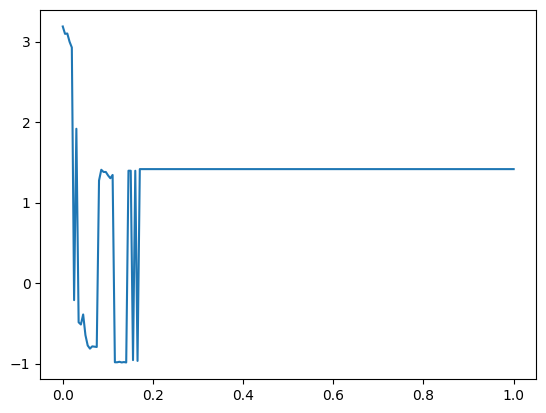

In [257]:
plt.plot(prms, res['INEQUALITY_CONSTRAINT_4'].observations.numpy().squeeze())

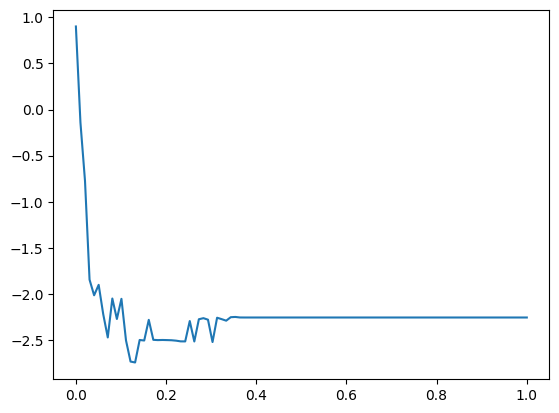

In [147]:
plt.plot(prms, res['OBJECTIVE'].observations.numpy().squeeze())

In [138]:
configs[5]

[0.39,
 0.46,
 0.05050505050505051,
 0.57609276,
 0.97080618,
 0.82664113,
 0.30932992,
 0.62469106,
 0.03787777,
 0.00543859,
 0.10672688,
 0.10077708]

In [82]:
with open("final_scbo_results/lunar_10/trust_region/data/run_0_data.pkl", "rb") as fp:
    run0 = pickle.load(fp)

In [91]:
np.set_printoptions(precision=30)

In [90]:
run0['OBJECTIVE'].query_points[652]

<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([0.32695865797088686 , 0.4958486355055563  , 0.7429634638193503  ,
       0.04857285086196522 , 0.8026090774915459  , 0.8346606449434633  ,
       0.07245907623457963 , 0.20608640335368336 , 0.009721362543119786,
       0.6160125202068396  , 0.06812324413157762 , 0.036041216827150266])>

In [94]:
tr_res[0]

array([-2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.                , -2.                , -2.                ,
       -2.          

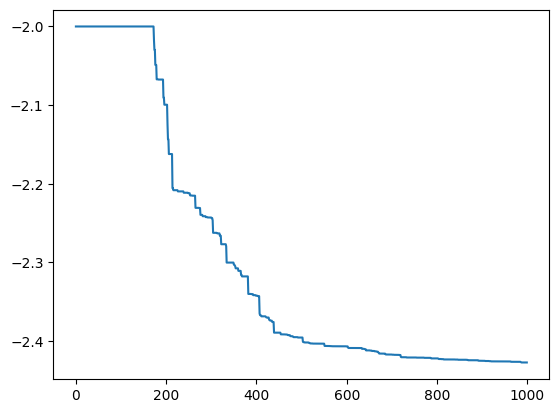

In [78]:
plt.plot(tr_mean)